In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [2]:
!gdown --id 1PY0cG1u96UAKY563Gt8bzA3tuTA4SRyN

zsh:1: command not found: gdown


In [3]:
! unzip spotify_dataset.zip

unzip:  cannot find or open spotify_dataset.zip, spotify_dataset.zip.zip or spotify_dataset.zip.ZIP.


In [4]:
# load the data into a dataframe
df = pd.read_csv("dataset.csv", index_col=[0])

In [5]:
# use the shape property to find (rows, columns)
print('There are {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

There are 114000 rows and 20 columns.


In [6]:
#view samples of the data
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
# use dtypes prooperty to find the data type of each column
print(df.dtypes)

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


We can see there are a couple columns which the data type should be changed.

- track_id should be a integer
- artists should be string
- album_name should be string
- track_name should be string
- track_genre should be string

In [8]:
# find the amount of missing data in each column
print(df.isnull().sum())

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [9]:
#count the frequency of missing values in each row (i.e. how many columns are empty)
df.isnull().sum(axis=1).sort_values(ascending = False)

65900     3
0         0
75997     0
76008     0
76007     0
         ..
37995     0
37994     0
37993     0
37992     0
113999    0
Length: 114000, dtype: int64

Out of 114000 rows, only one row have missing data for "artists", "album_name", and "track_name", so we can simply drop that row.

In [10]:
# delete the row with missing data
df = df.dropna()

In [11]:
#remove any duplicate rows (each of the row must be unique - duplication is not allowed)
df.drop_duplicates(inplace=True)

In [12]:
# check for invalid data
df.describe(include='all')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,113549,113549,113549,113549,113549.000000,1.135490e+05,113549,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549
unique,89740,31437,46589,73608,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acoustic
freq,9,279,195,151,NaN,NaN,103831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,NaN,NaN,NaN,NaN,33.324433,2.280814e+05,NaN,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218,NaN
std,NaN,NaN,NaN,NaN,22.283855,1.064131e+05,NaN,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.586000e+03,NaN,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,17.000000,1.741840e+05,NaN,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000,NaN
50%,NaN,NaN,NaN,NaN,35.000000,2.130000e+05,NaN,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000,NaN
75%,NaN,NaN,NaN,NaN,50.000000,2.615880e+05,NaN,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000,NaN


There does not seem to be invalid data in the dataset. But one thing we should do to prepare the dataset for analysis later is to convert popularity column to be out of 1 instead of 100. Because that is what the other measures are out of (danceability, energy, speechiness, etc).

In [13]:
df['popularity'] = df['popularity'].div(100)

In [14]:
df["duration_mins"] = df["duration_ms"]/60000
df.drop(columns="duration_ms", inplace=True)

In [15]:
# check to see if things have been fixed
df.describe(include='all')

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_mins
count,113549,113549,113549,113549,113549.000000,113549,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549,113549.000000
unique,89740,31437,46589,73608,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114,NaN
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acoustic,NaN
freq,9,279,195,151,NaN,103831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,NaN
mean,NaN,NaN,NaN,NaN,0.333244,NaN,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218,NaN,3.801356
std,NaN,NaN,NaN,NaN,0.222839,NaN,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117,NaN,1.773552
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.143100
25%,NaN,NaN,NaN,NaN,0.170000,NaN,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000,NaN,2.903067
50%,NaN,NaN,NaN,NaN,0.350000,NaN,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000,NaN,3.550000
75%,NaN,NaN,NaN,NaN,0.500000,NaN,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000,NaN,4.359800


In [16]:
df.head()

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_mins
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217


In [17]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
count,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,0.333244,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218,3.801356
std,0.222839,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117,1.773552
min,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143100
25%,0.170000,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000,2.903067
50%,0.350000,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000,3.550000
75%,0.500000,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000,4.359800
max,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,87.288250


## Encode and Transformation


Prepare our feature list, X

In [27]:
#X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
X = df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'loudness',  'valence']]
y = df['popularity']

In [18]:
#explicit_encoded = pd.get_dummies(df['explicit'], prefix="Explicit", drop_first=True)

In [19]:
#explicit_encoded.head()

In [20]:
#X = X.join(explicit_encoded)

In [21]:
X.head()

,danceability,energy,speechiness,key,acousticness,instrumentalness,liveness,loudness,tempo,duration_mins,valence
0,0.676,0.4610,0.1430,1,0.0322,0.000001,0.3580,-6.746,87.917,3.844433,0.715
1,0.420,0.1660,0.0763,1,0.9240,0.000006,0.1010,-17.235,77.489,2.493500,0.267
2,0.438,0.3590,0.0557,0,0.2100,0.000000,0.1170,-9.734,76.332,3.513767,0.120
3,0.266,0.0596,0.0363,0,0.9050,0.000071,0.1320,-18.515,181.740,3.365550,0.143
4,0.618,0.4430,0.0526,2,0.4690,0.000000,0.0829,-9.681,119.949,3.314217,0.167


## Splitting the Data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.2,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    shuffle=True
                                                   )

In [33]:
X_train = None
X_test = None
y_train = None
y_test = None
def reset_test():
    X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.2,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    shuffle=True
                                                   )

In [207]:
X_train

,danceability,energy,speechiness,key,acousticness,instrumentalness,liveness,loudness,tempo,duration_mins,valence
45283,0.180,0.0968,0.0478,0,0.863000,0.938000,0.1200,-22.729,80.867,0.761900,0.388
39360,0.197,0.6030,0.0454,5,0.302000,0.794000,0.1060,-16.116,169.881,1.771333,0.232
55246,0.383,0.6350,0.0950,1,0.496000,0.000000,0.0715,-6.331,95.112,3.858367,0.400
24630,0.676,0.7810,0.0387,7,0.000605,0.929000,0.0830,-9.988,135.254,5.701900,0.630
30698,0.665,0.8940,0.0672,10,0.149000,0.000009,0.1050,-5.038,125.007,3.171700,0.737
...,...,...,...,...,...,...,...,...,...,...,...
104446,0.461,0.8010,0.0298,7,0.001150,0.000036,0.2740,-11.133,99.677,2.666667,0.963
10756,0.650,0.7590,0.0304,6,0.008980,0.002400,0.0858,-5.095,135.030,4.367667,0.425
49898,0.823,0.8370,0.1500,10,0.210000,0.000137,0.0691,-5.261,179.989,3.690450,0.331
58810,0.362,0.9700,0.2130,8,0.000059,0.030500,0.0489,-5.797,172.189,3.739567,0.297


In [178]:
X_test

In [179]:
X_train.describe()

AttributeError: 'NoneType' object has no attribute 'describe'

## Scaling/Normalizing Training Set 

In [177]:
reset_test()

In [35]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']])
#X_train['key'] = OneHotEncoder().fit_transform(X_train[["key"]])

In [23]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train.to_numpy())

X_train = pd.DataFrame(X_train, columns=['danceability', 'energy',  'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', ])

ValueError: Shape of passed values is (79484, 11), indices imply (79484, 7)

In [140]:
train_std_scaler = StandardScaler()
X_train = train_std_scaler.fit_transform(X_train)

X_train = pd.DataFrame(X_train, columns=['danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'time_signature', 'Explicit_True'])

In [163]:
X_train.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
count,7.948400e+04,7.948400e+04,7.948400e+04,7.948400e+04,7.948400e+04,7.948400e+04,7.948400e+04
mean,1.005687e-16,-2.280899e-16,-9.368537e-17,1.180007e-17,-1.054854e-16,-9.404295e-17,4.277524e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-3.268905e+00,-2.557114e+00,-7.989900e-01,-9.454947e-01,-5.015572e-01,-1.119864e+00,-1.826895e+00
25%,-6.391532e-01,-6.699244e-01,-4.611762e-01,-8.958107e-01,-5.015572e-01,-6.073516e-01,-8.250796e-01
50%,7.595465e-02,1.701539e-01,-3.379071e-01,-4.396219e-01,-5.014270e-01,-4.293650e-01,-4.289265e-02
75%,7.333925e-01,8.430127e-01,-1.034192e-03,8.491493e-01,-3.511706e-01,3.134443e-01,8.047977e-01
max,2.411589e+00,1.424299e+00,8.262702e+00,2.053608e+00,2.744780e+00,4.111188e+00,2.006977e+00


## Scaling/Normalizing Test Set 

In [36]:
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',]])

In [161]:
test_std_scaler = StandardScaler()
X_test = test_std_scaler.fit_transform(X_test.to_numpy())

X_test = pd.DataFrame(X_test, columns=['danceability', 'energy','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', ])

In [ ]:
# lambda numpy array transformed 

In [42]:
X.describe()
# key, loudness, tempo, normalized

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,loudness,valence
count,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,0.567031,0.642091,0.084674,0.314064,0.155703,0.213613,-8.243408,0.474205
std,0.173409,0.251053,0.105762,0.331906,0.309217,0.190462,5.011422,0.259204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000
25%,0.456000,0.473000,0.035900,0.016800,0.000000,0.098000,-9.998000,0.260000
50%,0.580000,0.685000,0.048900,0.168000,0.000041,0.132000,-6.997000,0.464000
75%,0.695000,0.854000,0.084500,0.596000,0.048700,0.273000,-5.001000,0.683000
max,0.985000,1.000000,0.965000,0.996000,1.000000,1.000000,4.532000,0.995000


In [ ]:
from sklearn.preprocessing import FunctionTransformer
# x < 0.1 -> 1, x > 0.95 -> 3, otherwise avg -> 2

#speechiness, 

# loudness, minmax 
def transform_instrumentalness():
    

In [35]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Explicit_True
45283,0.180,0.0968,0,-22.729,1,0.0478,0.863000,0.938000,0.1200,0.388,80.867,1,0
39360,0.197,0.6030,5,-16.116,0,0.0454,0.302000,0.794000,0.1060,0.232,169.881,3,0
55246,0.383,0.6350,1,-6.331,1,0.0950,0.496000,0.000000,0.0715,0.400,95.112,4,0
24630,0.676,0.7810,7,-9.988,1,0.0387,0.000605,0.929000,0.0830,0.630,135.254,4,0
30698,0.665,0.8940,10,-5.038,1,0.0672,0.149000,0.000009,0.1050,0.737,125.007,4,0


## Building the RandomForestRegressor

In [77]:
X_train.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Explicit_True
count,7.948400e+04,7.948400e+04,7.948400e+04,7.948400e+04,7.948400e+04,7.948400e+04,7.948400e+04,7.948400e+04,7.948400e+04,7.948400e+04,7.948400e+04,7.948400e+04,7.948400e+04
mean,1.005687e-16,-2.280899e-16,-1.466069e-17,4.398206e-17,-6.919129e-17,-9.368537e-17,1.180007e-17,-1.054854e-16,-9.404295e-17,4.277524e-17,6.900357e-16,-3.414867e-16,-4.898815e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-3.268905e+00,-2.557114e+00,-1.490918e+00,-8.221341e+00,-1.328478e+00,-7.989900e-01,-9.454947e-01,-5.015572e-01,-1.119864e+00,-1.826895e+00,-4.069717e+00,-9.066099e+00,-3.092993e-01
25%,-6.391532e-01,-6.699244e-01,-9.298083e-01,-3.477445e-01,-1.328478e+00,-4.611762e-01,-8.958107e-01,-5.015572e-01,-6.073516e-01,-8.250796e-01,-7.631454e-01,2.203792e-01,-3.092993e-01
50%,7.595465e-02,1.701539e-01,-8.814373e-02,2.520196e-01,7.527412e-01,-3.379071e-01,-4.396219e-01,-5.014270e-01,-4.293650e-01,-4.289265e-02,-5.575335e-03,2.203792e-01,-3.092993e-01
75%,7.333925e-01,8.430127e-01,7.535208e-01,6.462868e-01,7.527412e-01,-1.034192e-03,8.491493e-01,-3.511706e-01,3.134443e-01,8.047977e-01,5.964975e-01,2.203792e-01,-3.092993e-01
max,2.411589e+00,1.424299e+00,1.595185e+00,2.543947e+00,7.527412e-01,8.262702e+00,2.053608e+00,2.744780e+00,4.111188e+00,2.006977e+00,4.035587e+00,2.541999e+00,3.233114e+00


In [53]:
random_forest = RandomForestRegressor()
params = {'n_estimators': np.arange(60,90,10),
         #'max_depth':np.arange(10,20,2),
          "min_samples_split": np.arange(2,6,2),
         #'class_weight': np.arange(1,10,1),
         'max_features':[4,5,6]}
        
# Hyperparmeters problem
# Best possible config 
# cv 7/8
random_forest_grid = GridSearchCV(random_forest, params, cv=5, return_train_score=True, n_jobs=-1)
random_forest_grid.fit(X_train_preprocessed, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': [4, 5, 6],
                         'min_samples_split': array([2, 4]),
                         'n_estimators': array([60, 70, 80])},
             return_train_score=True)

In [54]:
print(f'Best parameters were: {random_forest_grid.best_params_}')

print(f'Best model: {random_forest_grid.best_estimator_}')

#print(f'Best features: {random_forest_grid.best_features_}')

Best parameters were: {'max_features': 5, 'min_samples_split': 2, 'n_estimators': 80}
Best model: RandomForestRegressor(max_features=5, n_estimators=80)


In [55]:
print(f'Best score was: {random_forest_grid.best_score_}')

Best score was: 0.47712602332224485


In [61]:
print(f'Best estimator was: {random_forest_grid.best_estimator_}')

Best estimator was: RandomForestRegressor(max_features=5, n_estimators=80)


In [56]:
y_pred = random_forest_grid.predict(X_test_preprocessed)


In [57]:
mean_squared_error(y_test, y_pred)

234.57415794787346

In [58]:
random_forest_grid.score(X_test_preprocessed, y_test)

0.5249435137354715

In [154]:
reset()

In [37]:
model = RandomForestRegressor(n_estimators=60, max_features=2, max_depth=20, min_samples_split=2, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#run_model(model, "Random Forrest Regressor")

In [38]:
model.score(X_test, y_test)

0.3495802345019481

In [39]:
from sklearn.metrics import accuracy_score, r2_score
mean_squared_error(y_test, y_pred)

0.032227341667827016

In [40]:
r2_score(y_test, y_pred)

0.3495802345019481

In [289]:

cv_results = pd.DataFrame(random_forest_grid.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
19,0.894493,0.000484,0.468536,0.005752
35,0.894469,0.000550,0.468416,0.004866
3,0.894587,0.000643,0.467363,0.004834
39,0.880284,0.000302,0.463689,0.005085
7,0.878425,0.000566,0.463358,0.005877


In [ ]:
#plot predicted vs actual y values

In [183]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [184]:
y_pred_normal = rf.predict(X_test)

In [247]:
mean_squared_error(y_test, y_pred_normal)

332.57289062515815

In [186]:
rf.score(X_test, y_test)

0.3264777747498795

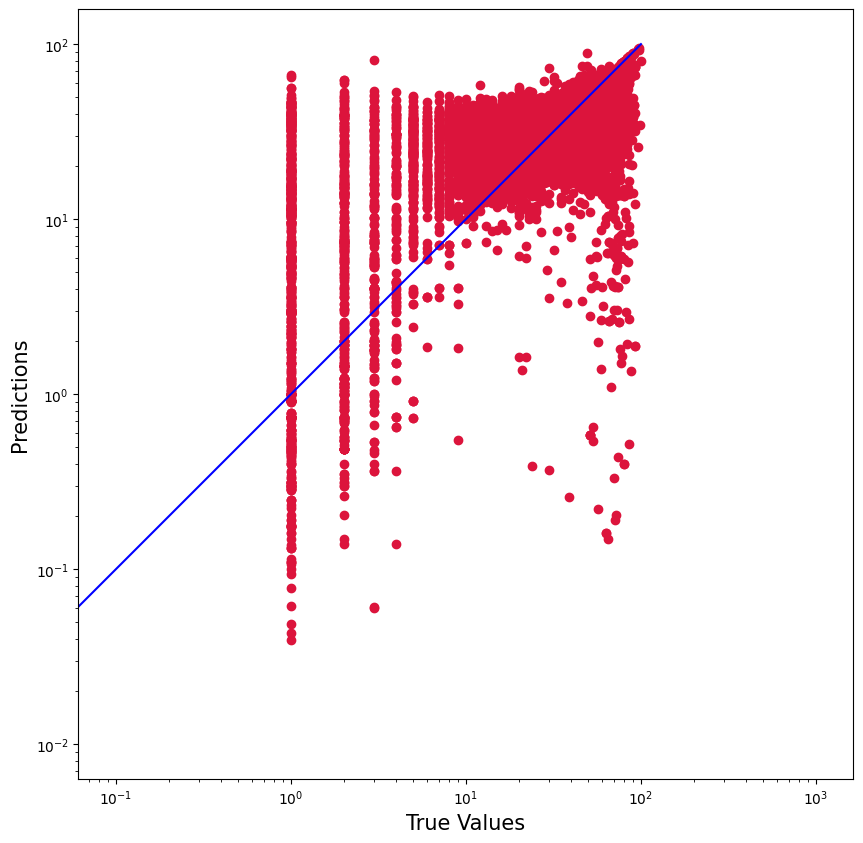

In [243]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

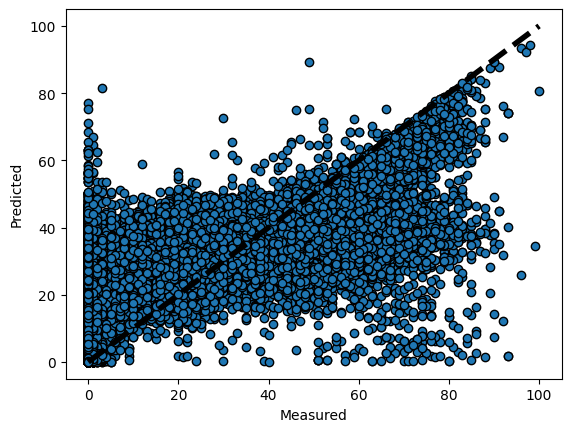

In [242]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [179]:
y_test.describe()

count    34065.000000
mean        33.286717
std         22.221524
min          0.000000
25%         17.000000
50%         35.000000
75%         50.000000
max        100.000000
Name: popularity, dtype: float64

In [178]:
y.describe()

count    113549.000000
mean         33.324433
std          22.283855
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

In [96]:
importances = model.feature_importances_ # get all of the feature importances
forest_importances = pd.Series(importances, index=X.columns) # create separate series
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
fig, ax = plt.subplots() # create figure
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

ValueError: Length of values (22) does not match length of index (11)

In [99]:
X_train.columns

Index(['danceability', 'energy', 'speechiness', 'key', 'acousticness',
       'instrumentalness', 'liveness', 'loudness', 'tempo', 'duration_mins',
       'valence'],
      dtype='object')

In [101]:
X_train_preprocessed

array([[ 3.32277337e-01,  7.76664910e-03,  1.00000000e+00, ...,
         1.20000000e-01, -2.27290000e+01,  3.88000000e-01],
       [ 6.98030176e-01,  2.04361942e-02,  0.00000000e+00, ...,
         1.06000000e-01, -1.61160000e+01,  2.32000000e-01],
       [ 3.90809132e-01,  4.66308541e-02,  0.00000000e+00, ...,
         7.15000000e-02, -6.33100000e+00,  4.00000000e-01],
       ...,
       [ 7.39563302e-01,  4.45233075e-02,  0.00000000e+00, ...,
         6.91000000e-02, -5.26100000e+00,  3.31000000e-01],
       [ 7.07513601e-01,  4.51397779e-02,  0.00000000e+00, ...,
         4.89000000e-02, -5.79700000e+00,  2.97000000e-01],
       [ 5.42396003e-01,  7.33099882e-02,  0.00000000e+00, ...,
         1.97000000e-02, -1.93900000e+00,  9.22000000e-01]])

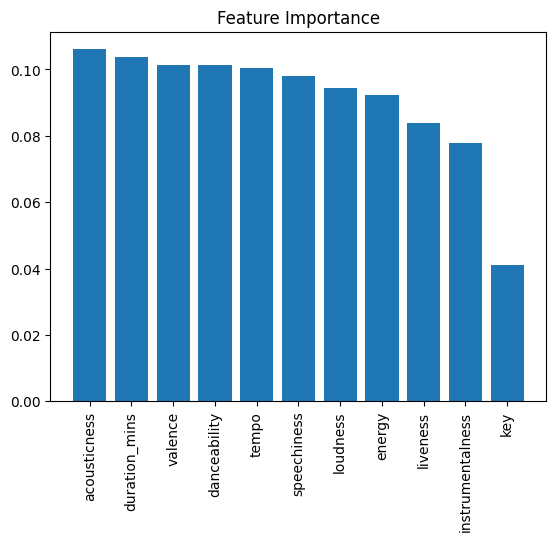

In [109]:
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()